# 빅콘테스트 퓨처스리그 : KBO 정규시즌 팀별 승률, 타율, 방어율 예측

2020.08.09 김채형

# EDA

## DER과 실점(R) 간의 상관관계

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('../../data/pitcher_all.csv', index_col=0)
data

,year,month,T_ID,P_ID,START_CK,RELIEF_CK,CG_CK,HOLD,INN2,BF,...,WLS_L,WLS_ND,WLS_S,WLS_W,KBB,AVG,OBP,SLG,OPS,DER
0,2016,4,HH,60757,0,8,0,0,30,195,...,0,8,0,0,NaN,0.372093,0.437500,0.581395,1.018895,50
1,2016,4,HH,60764,1,1,0,0,2,48,...,1,1,0,0,1.800,0.500000,0.875000,0.500000,1.375000,3
2,2016,4,HH,60768,2,0,0,0,24,123,...,2,0,0,0,0.000,0.258065,0.323529,0.483871,0.807400,50
3,2016,4,HH,63791,0,10,0,0,32,181,...,0,10,0,0,1.000,0.225000,0.311111,0.275000,0.586111,49
4,2016,4,HH,65764,3,1,0,0,22,192,...,3,1,0,0,2.200,0.428571,0.534884,0.657143,1.192027,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5299,2020,7,WO,68341,0,9,0,3,24,152,...,2,7,0,0,1.400,0.200000,0.368421,0.300000,0.668421,31
5300,2020,7,WO,69343,3,0,0,0,60,293,...,0,1,0,2,1.375,0.293333,0.311688,0.373333,0.685022,105
5301,2020,7,WO,69360,1,0,0,0,2,24,...,0,1,0,0,11.000,0.600000,0.714286,0.800000,1.514286,7
5302,2020,7,WO,69399,0,2,0,0,10,70,...,0,2,0,0,0.000,0.529412,0.550000,0.588235,1.138235,27


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5304 entries, 0 to 5303
Data columns (total 53 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        5304 non-null   int64  
 1   month       5304 non-null   int64  
 2   T_ID        5304 non-null   object 
 3   P_ID        5304 non-null   int64  
 4   START_CK    5304 non-null   int64  
 5   RELIEF_CK   5304 non-null   int64  
 6   CG_CK       5304 non-null   int64  
 7   HOLD        5304 non-null   int64  
 8   INN2        5304 non-null   int64  
 9   BF          5304 non-null   int64  
 10  PA          5304 non-null   int64  
 11  AB          5304 non-null   int64  
 12  HIT         5304 non-null   int64  
 13  H2          5304 non-null   int64  
 14  H3          5304 non-null   int64  
 15  HR          5304 non-null   int64  
 16  SB          5304 non-null   int64  
 17  CS          5304 non-null   int64  
 18  SH          5304 non-null   int64  
 19  SF          5304 non-null  

In [4]:
data['CG_CK'].unique()

array([0, 1, 2])

In [5]:
df = data.copy()

/Users/kimchaehyeong/.pyenv/versions/anaconda3-5.3.0/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  
/Users/kimchaehyeong/.pyenv/versions/anaconda3-5.3.0/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Second argument 'R' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  


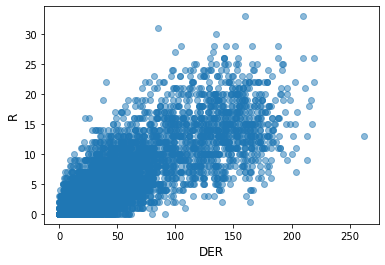

In [6]:
# scatter plot
plt.plot('DER', 'R', data=df, linestyle='none', marker='o', alpha=0.5)
plt.xlabel('DER', fontsize=12)
plt.ylabel('R', fontsize=12)
plt.show()

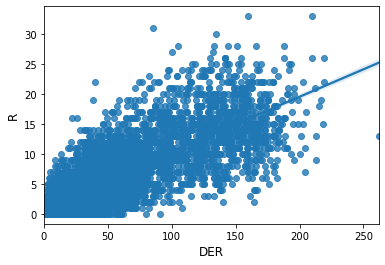

In [7]:
# regression plot
sns.regplot(x=df['DER'], y=df['R'], fit_reg=True)
plt.xlabel('DER', fontsize=12)
plt.ylabel('R', fontsize=12)
plt.show()

In [8]:
df_groupby = df.groupby(df['P_ID']).mean()
df_groupby

,year,month,START_CK,RELIEF_CK,CG_CK,HOLD,INN2,BF,PA,AB,...,WLS_L,WLS_ND,WLS_S,WLS_W,KBB,AVG,OBP,SLG,OPS,DER
P_ID,,,,,,,,,,,,,,,,,,,,,
50030,2020.000000,6.000000,3.666667,0.000000,0.0,0.000000,58.000000,320.333333,86.000000,78.333333,...,1.666667,0.666667,0.000000,1.333333,1.820370,0.285260,0.343536,0.412703,0.756239,114.666667
50036,2020.000000,5.500000,0.000000,2.000000,0.0,0.000000,8.500000,54.500000,16.500000,11.500000,...,0.000000,2.000000,0.000000,0.000000,1.777778,0.392308,0.520243,0.646154,1.166397,17.000000
50040,2020.000000,6.000000,5.000000,0.000000,0.0,0.000000,91.333333,511.666667,131.000000,120.333333,...,1.666667,1.333333,0.000000,2.000000,0.566667,0.280498,0.327802,0.407027,0.734829,158.333333
50126,2020.000000,6.000000,2.000000,0.666667,0.0,0.000000,40.000000,231.666667,57.000000,48.000000,...,0.666667,1.333333,0.000000,0.666667,1.122222,0.172980,0.291808,0.191919,0.483727,68.666667
50157,2020.000000,6.000000,0.333333,3.000000,0.0,0.333333,13.666667,81.333333,22.000000,19.000000,...,0.333333,3.000000,0.000000,0.000000,1.196970,0.239583,0.275132,0.378472,0.653604,27.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97541,2016.000000,8.000000,0.000000,5.000000,0.0,0.333333,18.000000,101.333333,29.000000,27.000000,...,1.000000,4.000000,0.000000,0.000000,1.121693,0.354423,0.377558,0.467966,0.845525,37.666667
99314,2016.200000,6.200000,0.600000,2.600000,0.0,0.000000,12.400000,66.600000,18.200000,16.800000,...,0.200000,3.000000,0.000000,0.000000,1.320960,0.396028,0.417058,0.569717,0.986775,23.000000
99445,2017.733333,6.600000,0.000000,6.266667,0.0,0.433333,20.000000,110.333333,28.366667,25.300000,...,0.266667,5.600000,0.033333,0.266667,1.718056,0.301330,0.348752,0.478684,0.827436,32.933333


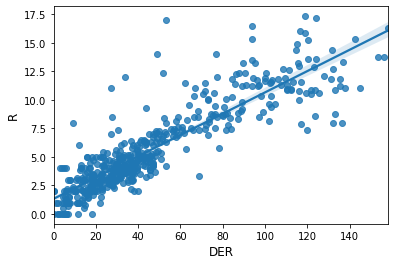

In [9]:
# regression plot
sns.regplot(x=df_groupby['DER'], y=df_groupby['R'], fit_reg=True)
plt.xlabel('DER', fontsize=12)
plt.ylabel('R', fontsize=12)
plt.show()

In [10]:
df.columns

Index(['year', 'month', 'T_ID', 'P_ID', 'START_CK', 'RELIEF_CK', 'CG_CK',
       'HOLD', 'INN2', 'BF', 'PA', 'AB', 'HIT', 'H2', 'H3', 'HR', 'SB', 'CS',
       'SH', 'SF', 'BB', 'IB', 'HP', 'KK', 'GD', 'WP', 'BK', 'ERR', 'R', 'ER',
       'VS_T_ID_HH', 'VS_T_ID_HT', 'VS_T_ID_KT', 'VS_T_ID_LG', 'VS_T_ID_LT',
       'VS_T_ID_NC', 'VS_T_ID_OB', 'VS_T_ID_SK', 'VS_T_ID_SS', 'VS_T_ID_WO',
       'TB_SC_B', 'TB_SC_T', 'WLS_D', 'WLS_L', 'WLS_ND', 'WLS_S', 'WLS_W',
       'KBB', 'AVG', 'OBP', 'SLG', 'OPS', 'DER'],
      dtype='object')

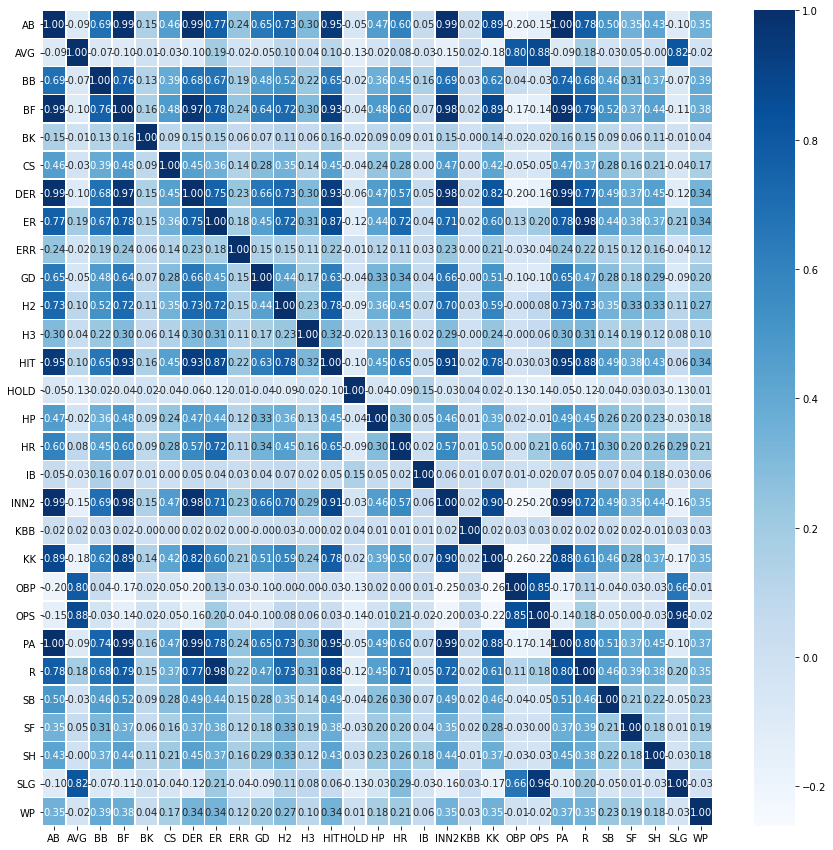

In [11]:
cate = ['year', 'month', 'T_ID', 'P_ID', 'START_CK', 'RELIEF_CK', 'CG_CK', 'VS_T_ID_HH', 'VS_T_ID_HT', 'VS_T_ID_KT', 'VS_T_ID_LG', 'VS_T_ID_LT', 'VS_T_ID_NC', 'VS_T_ID_OB', 'VS_T_ID_SK', 'VS_T_ID_SS', 'VS_T_ID_WO','TB_SC_B', 'TB_SC_T','WLS_D', 'WLS_L', 'WLS_ND', 'WLS_S', 'WLS_W']
cor = df[df.columns.difference(cate)].corr()

plt.figure(figsize=(15,15))
sns.heatmap(data=cor, annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')